#### Кластеризация.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

1. Построить гистограмму распределения признаков. 

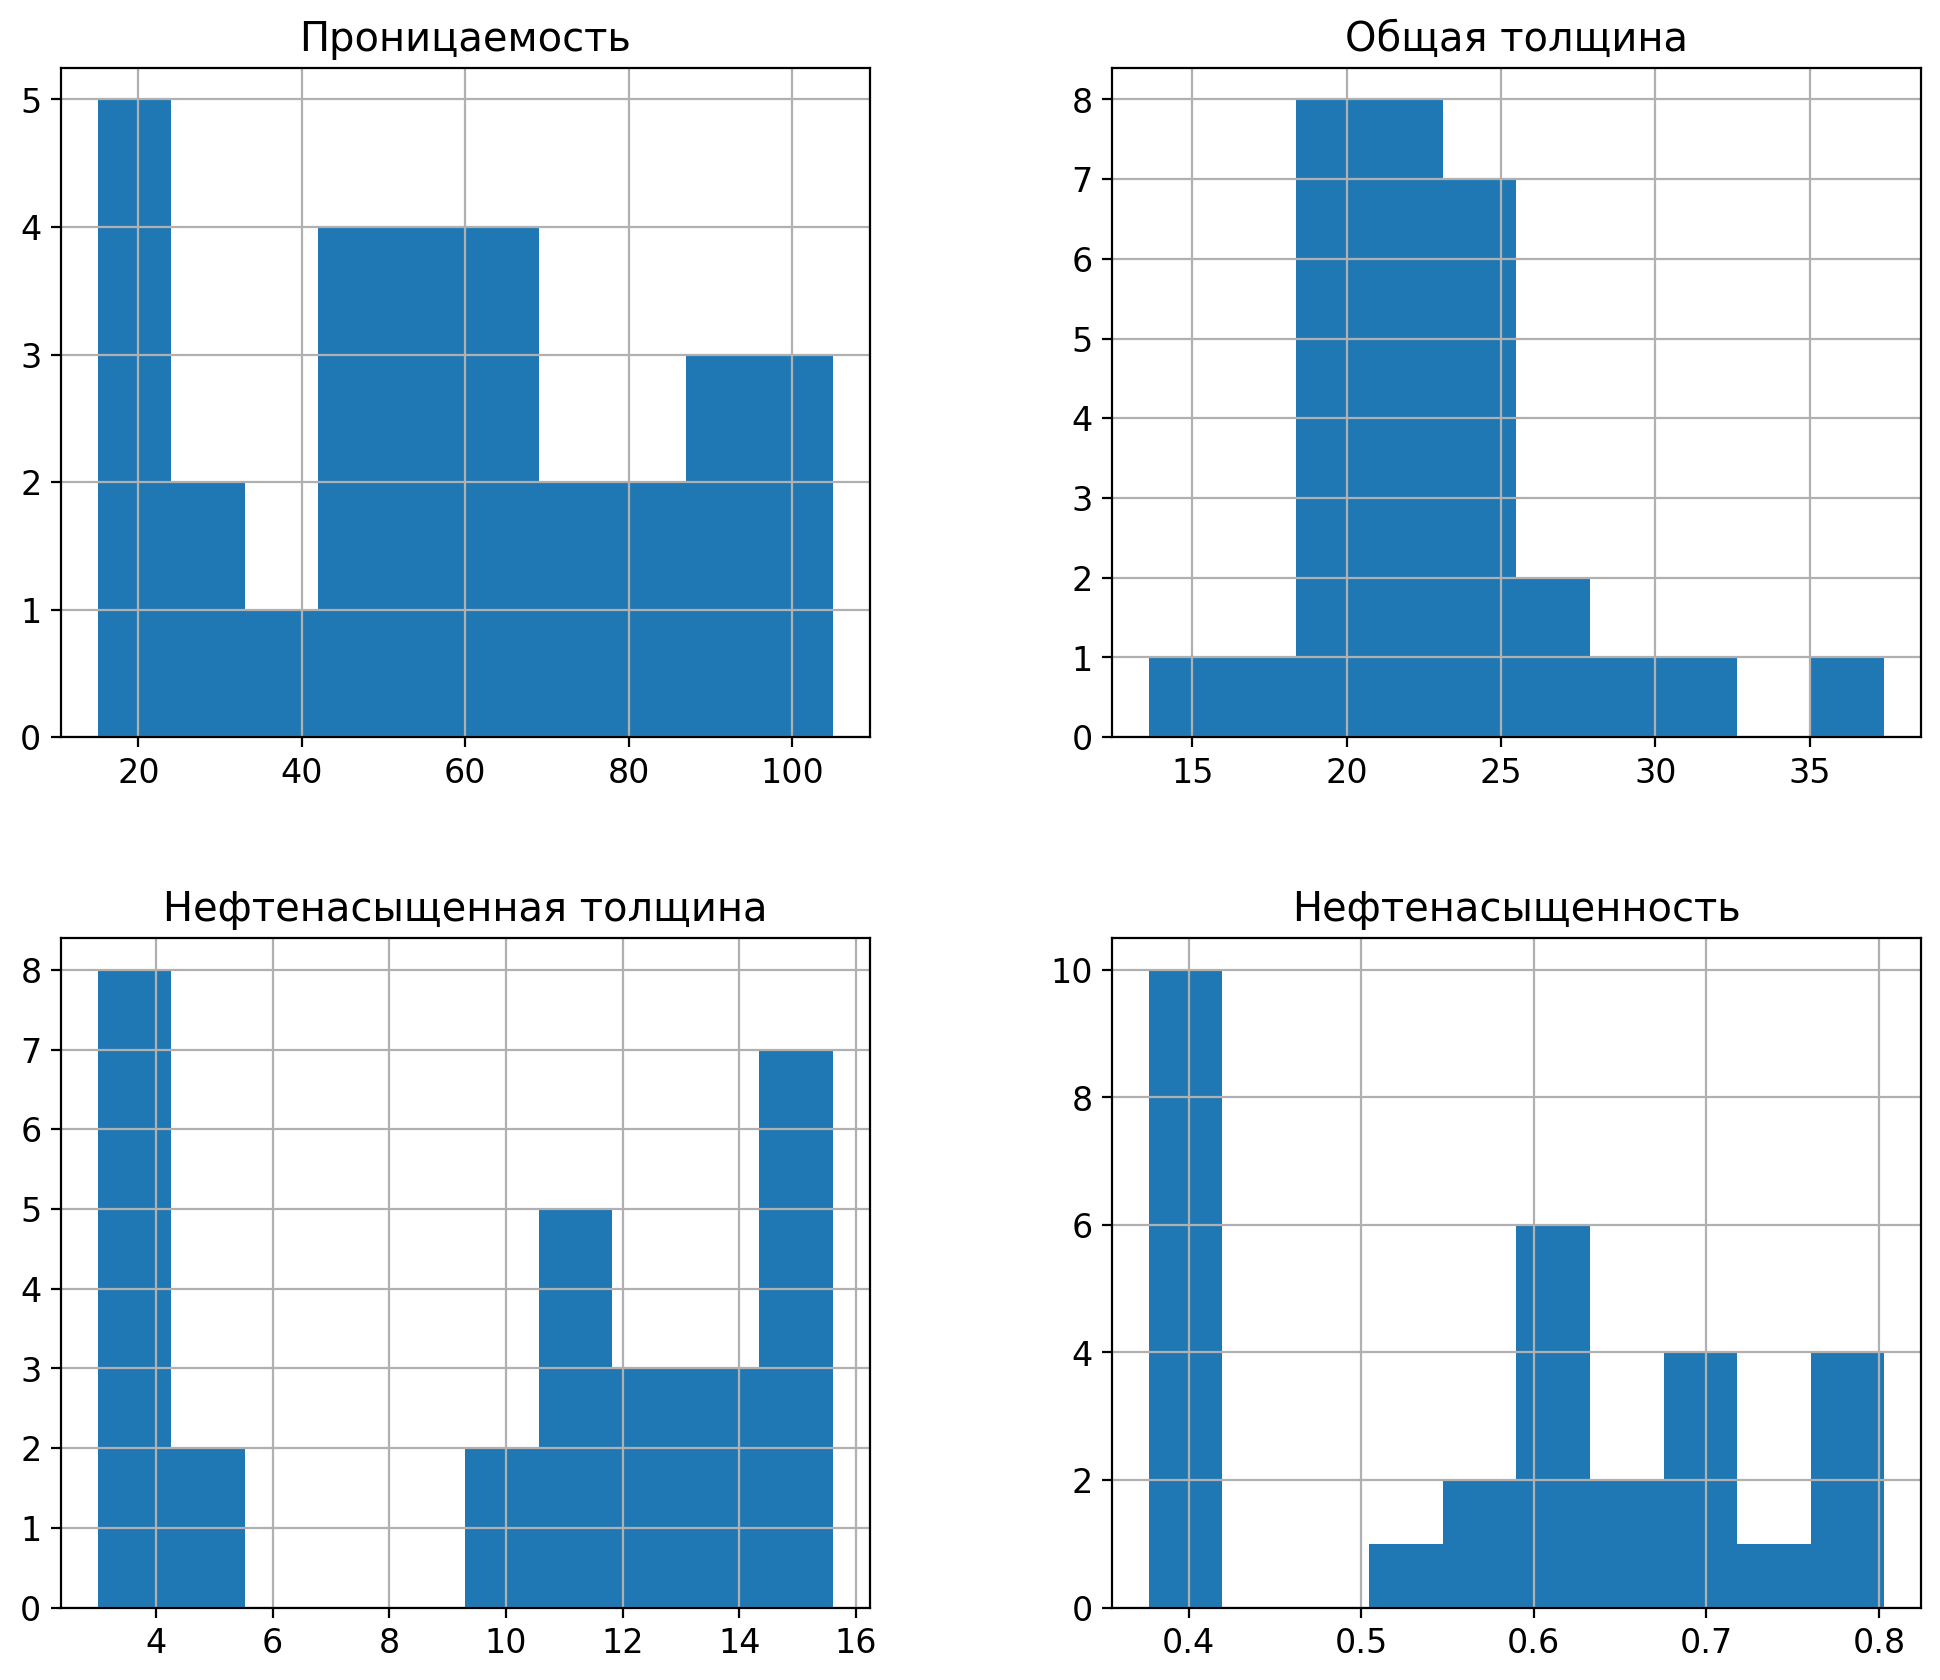

In [34]:
df = pd.read_excel('cluster_ier_var_2023.xlsx', sheet_name='Лист22')

df.hist(figsize=(12, 10))
plt.show()


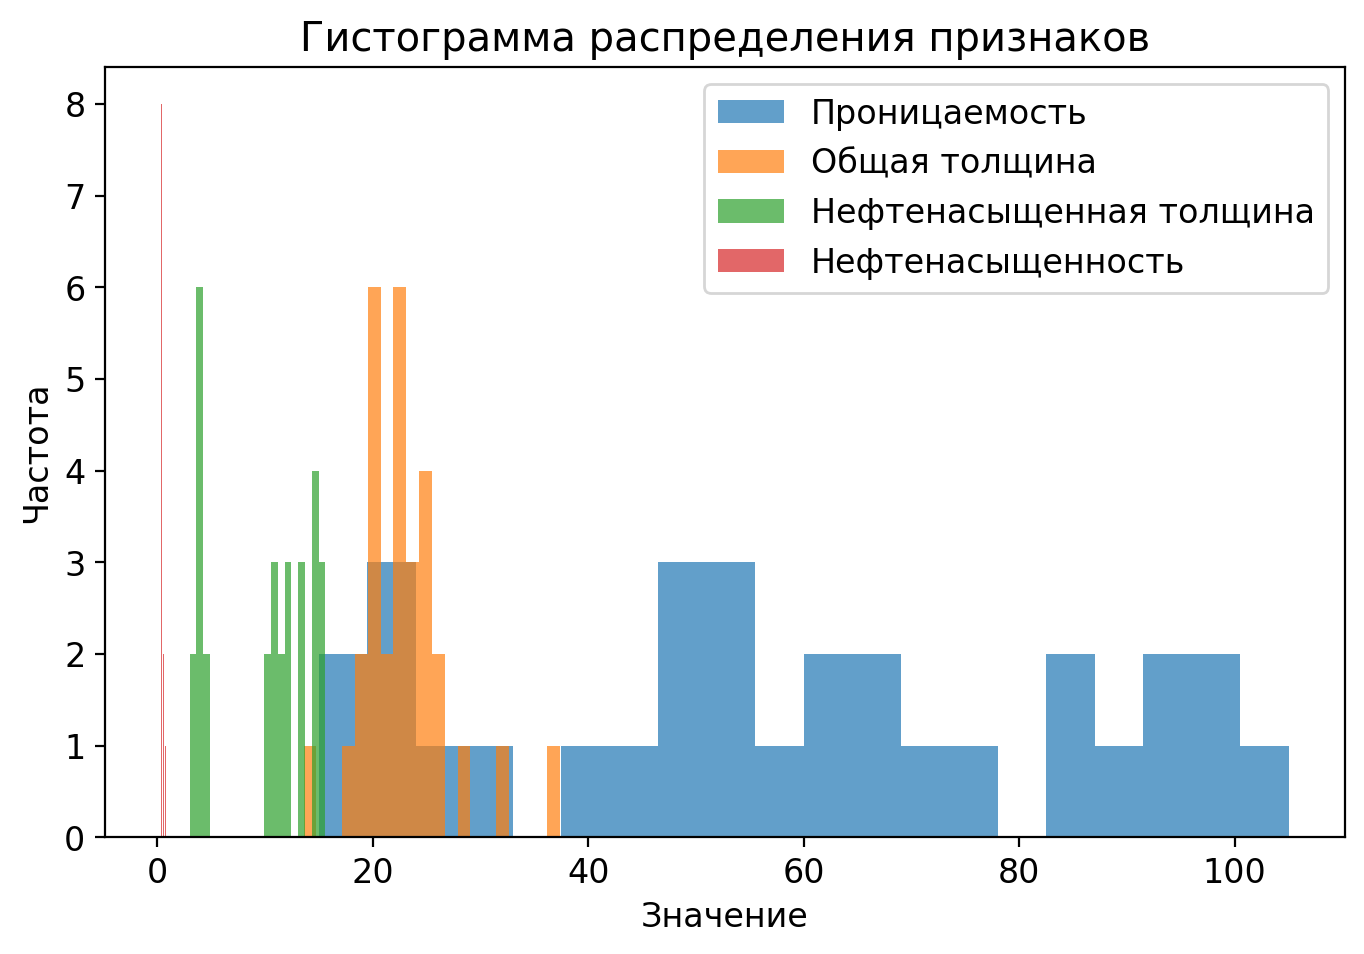

In [35]:
for column in df.columns:
    plt.hist(df[column], bins=20, alpha=0.7, label=column)

plt.legend()
plt.title('Гистограмма распределения признаков')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

2.	Провести нормализацию или стандартизацию значений параметров  

А) Нормализация.

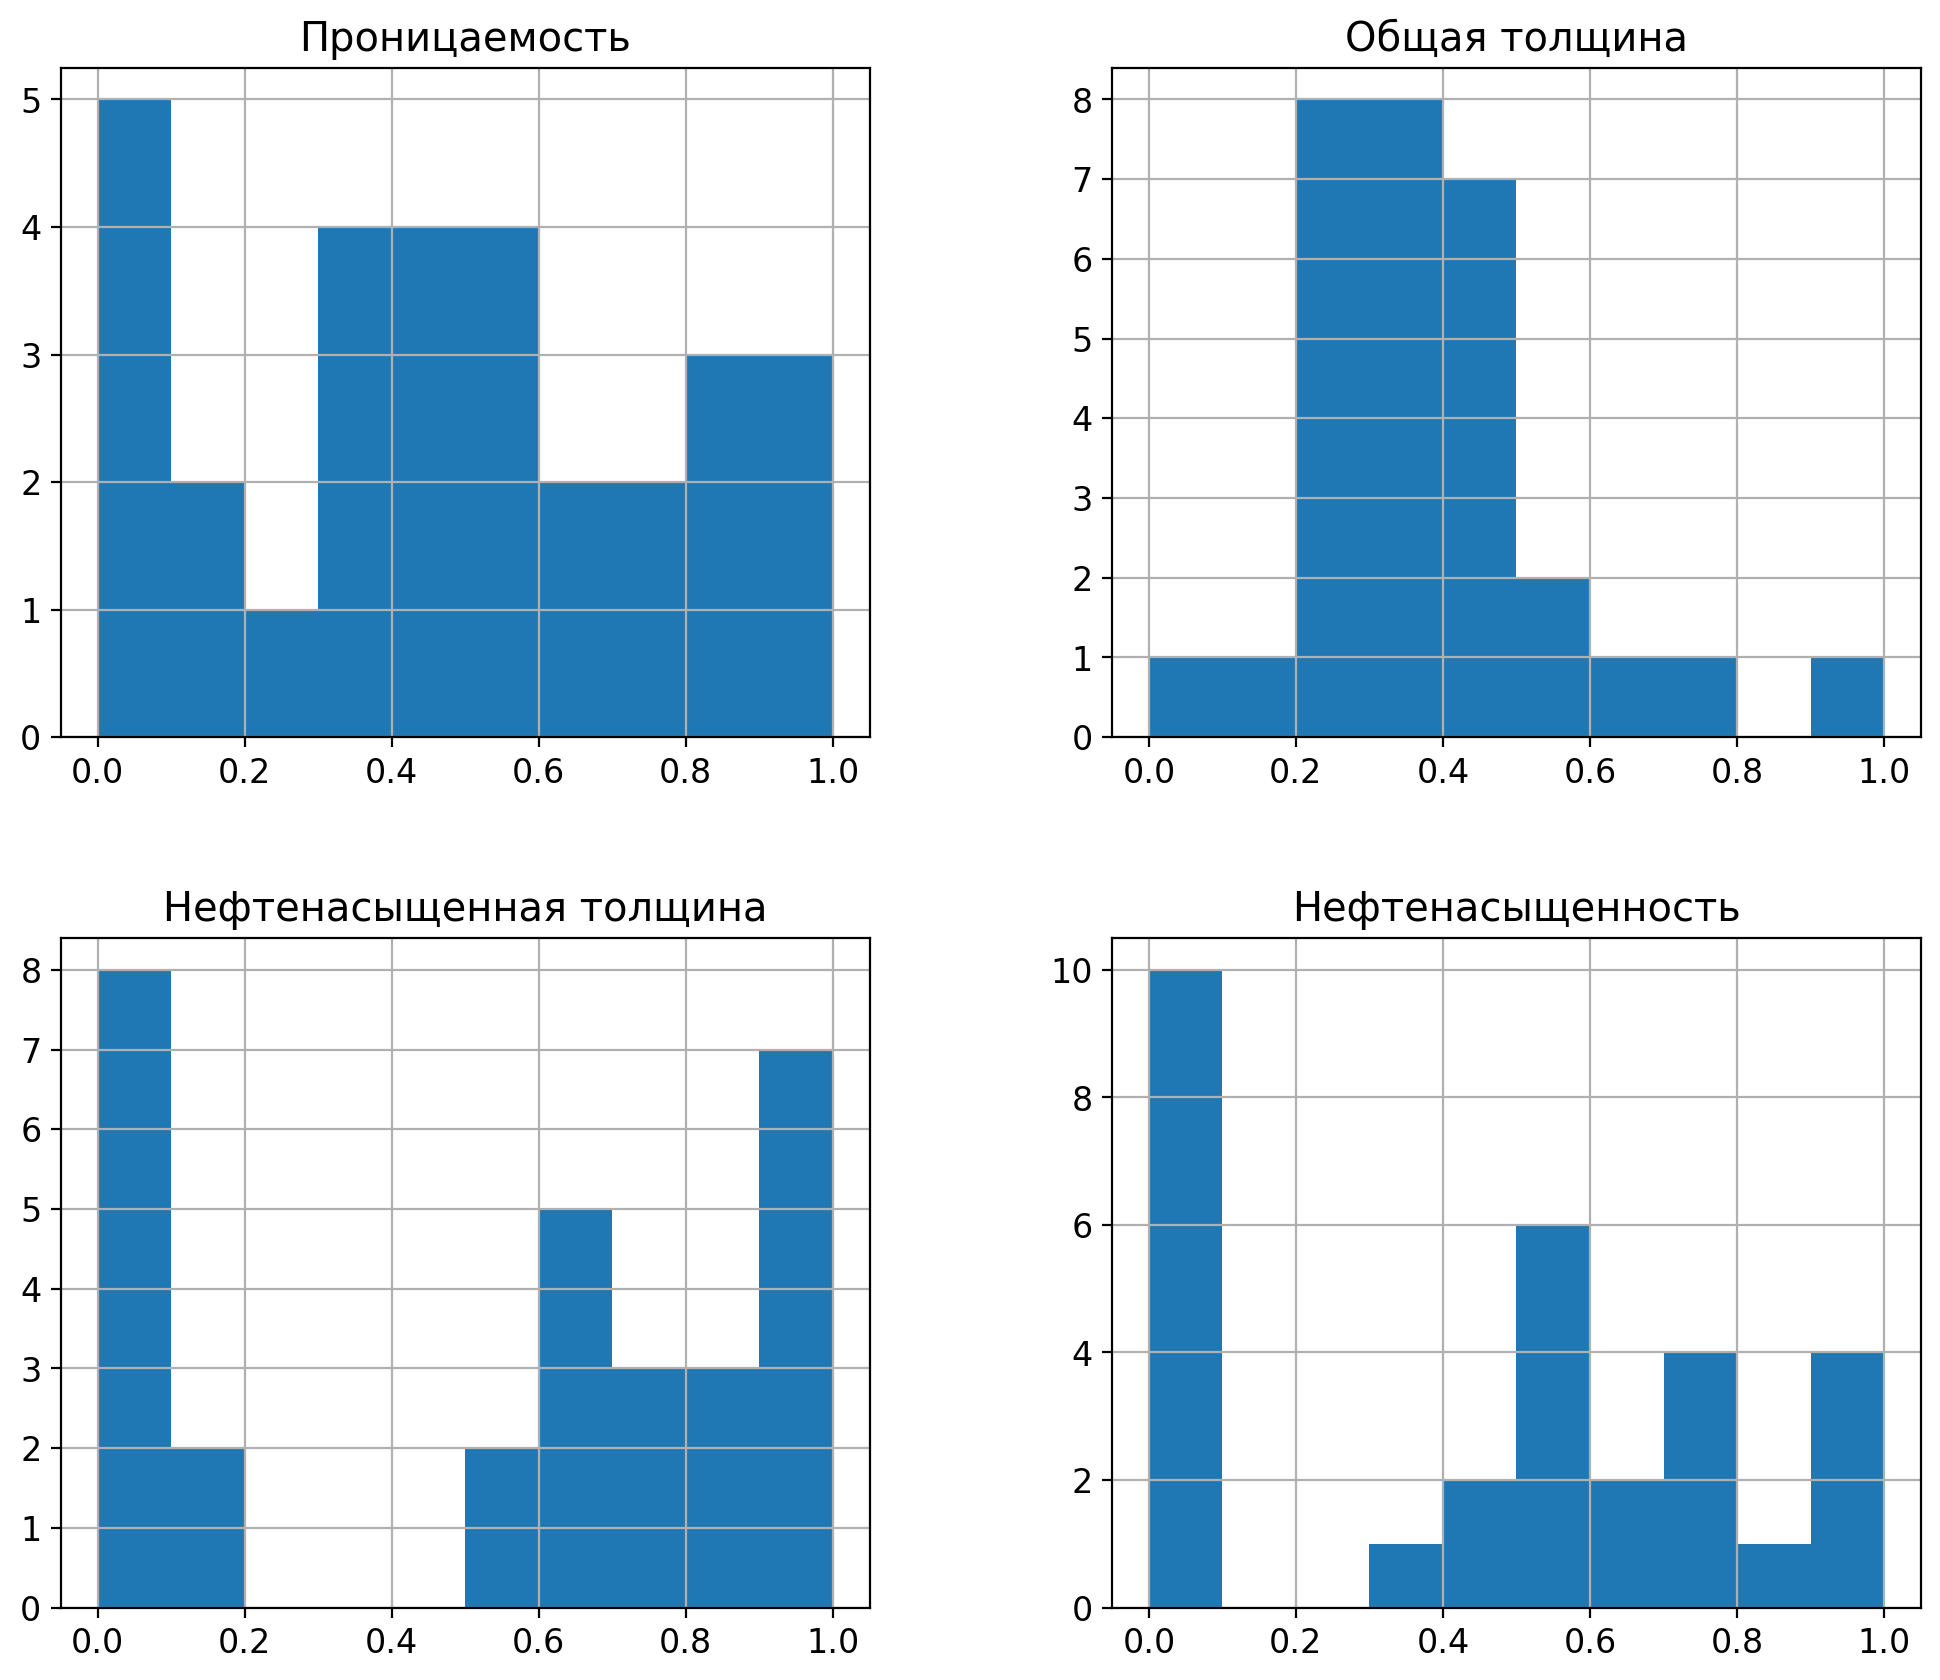

In [36]:
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized.hist(figsize=(12, 10))
plt.show()

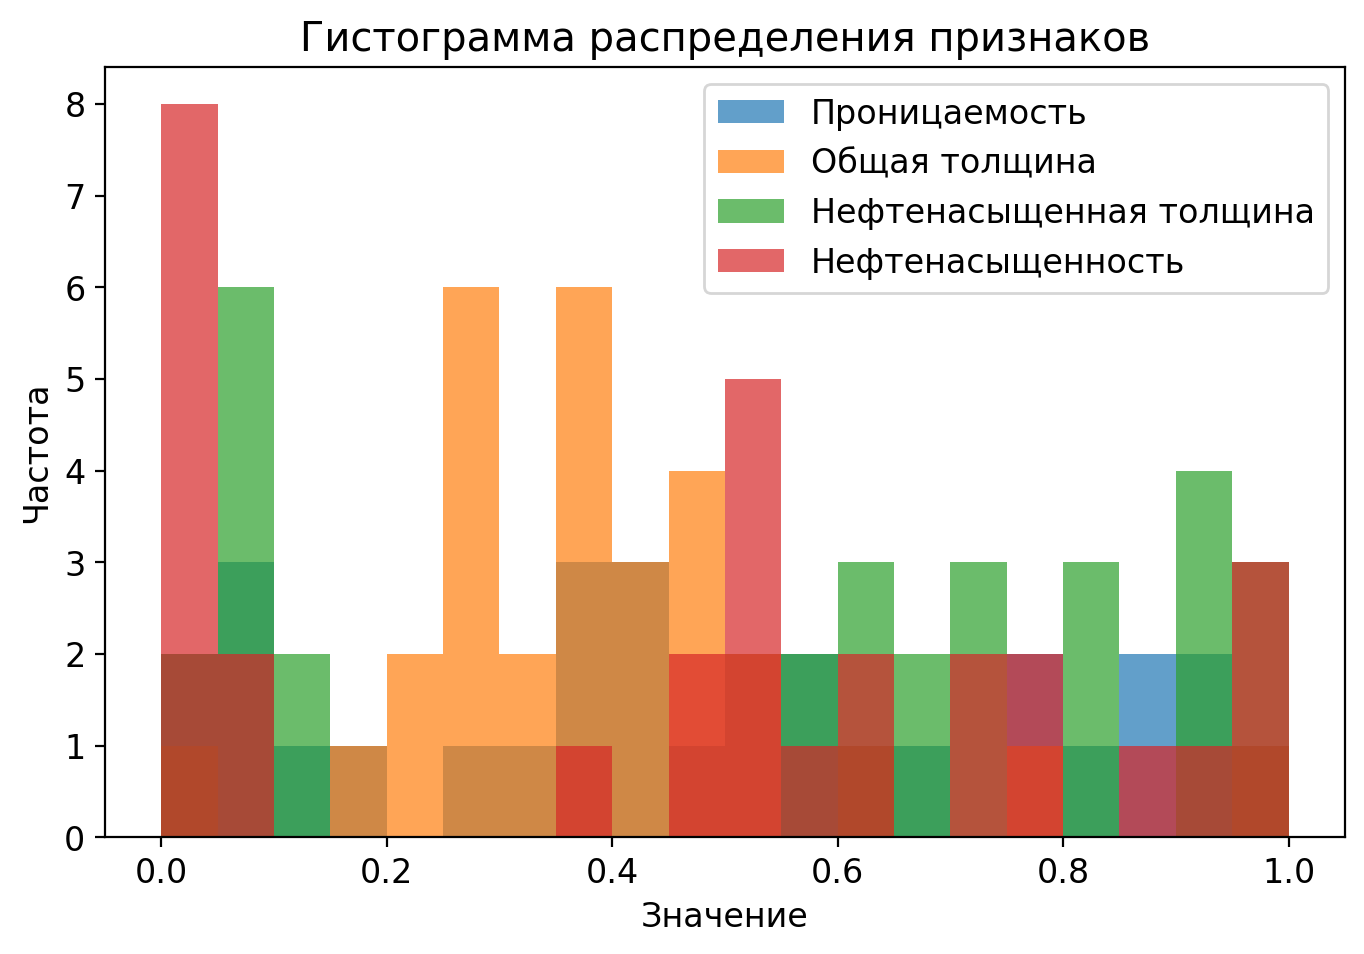

In [37]:
for column in df_normalized.columns:
    plt.hist(df_normalized[column], bins=20, alpha=0.7, label=column)

plt.legend()
plt.title('Гистограмма распределения признаков')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Б) Стандартизация

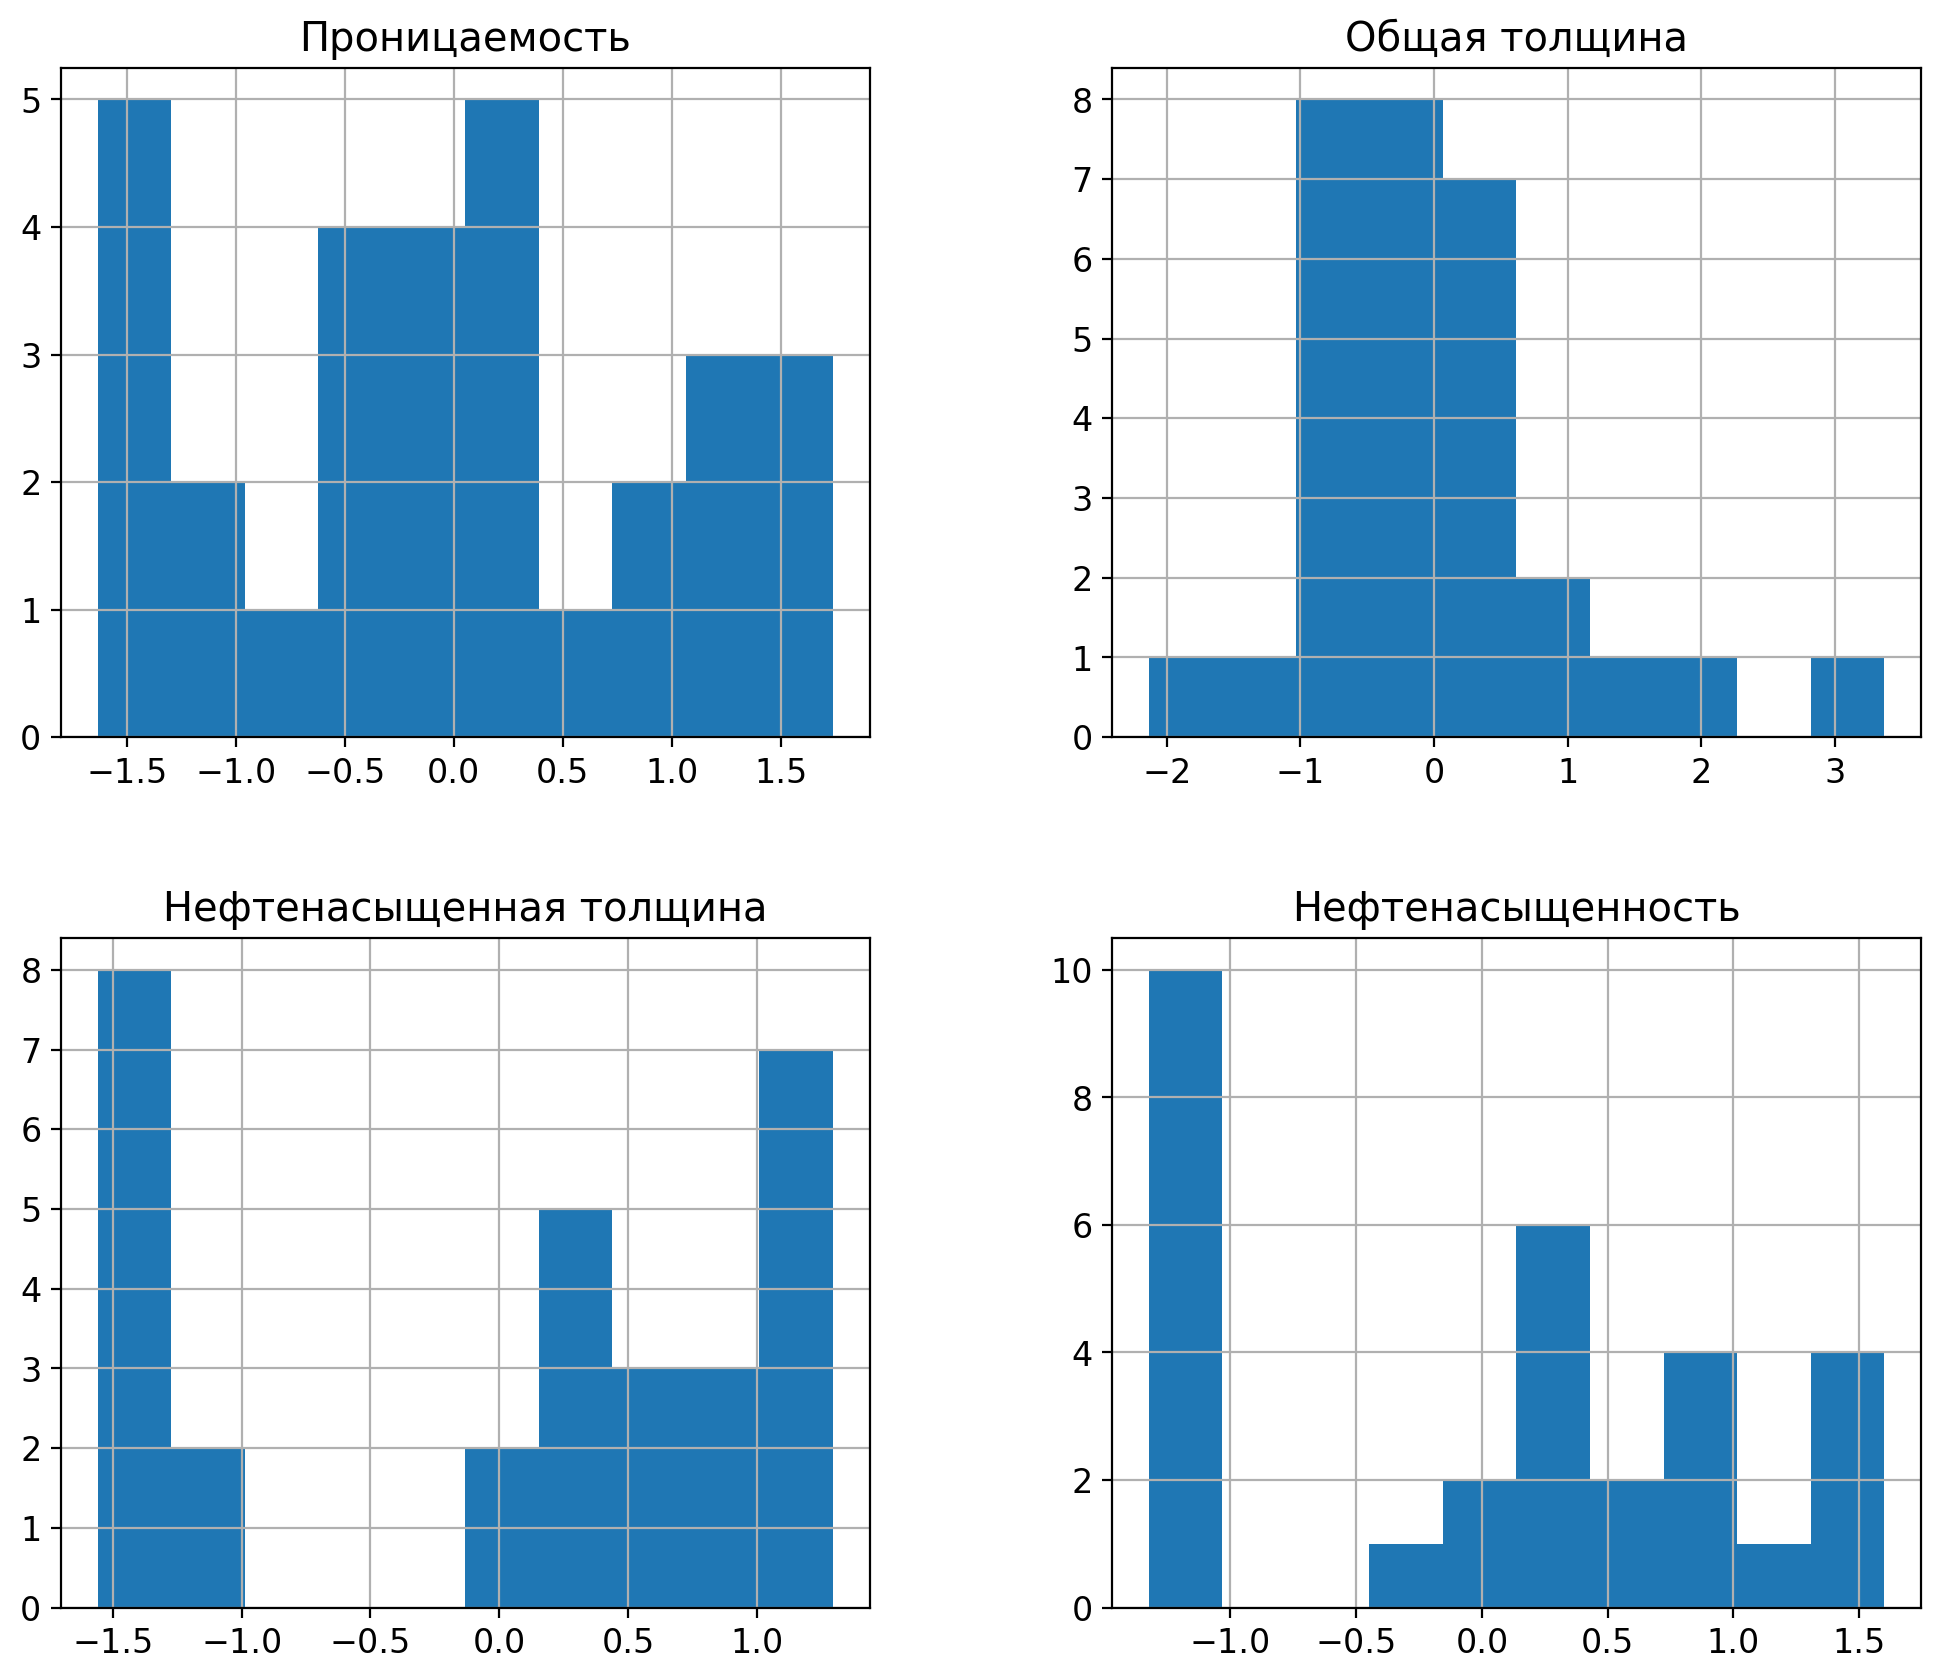

In [38]:
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_standardized.hist(figsize=(12, 10))
plt.show()

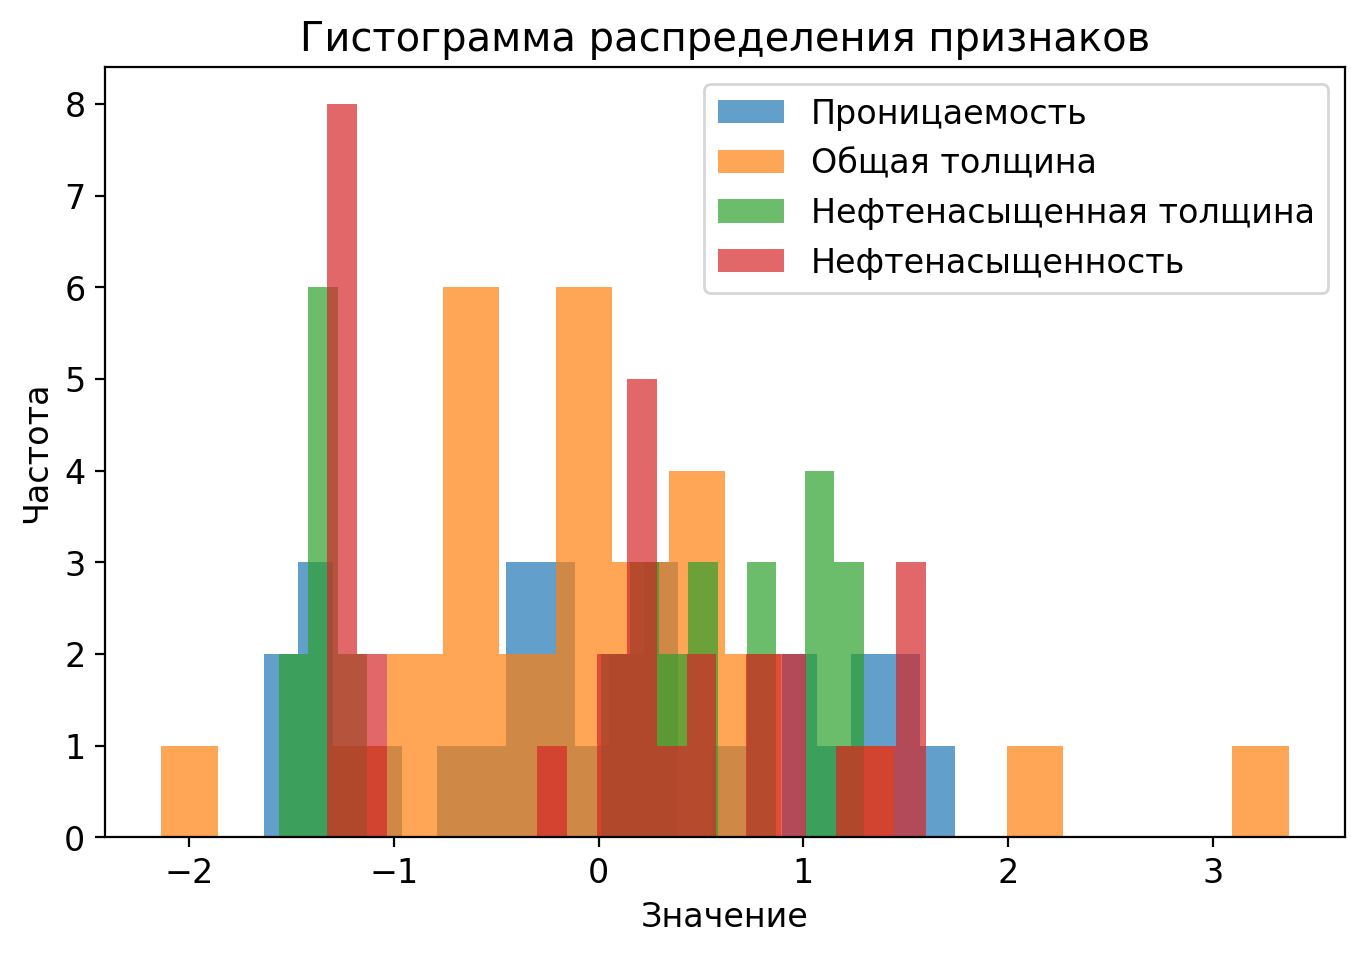

In [39]:
for column in df_standardized.columns:
    plt.hist(df_standardized[column], bins=20, alpha=0.7, label=column)

plt.legend()
plt.title('Гистограмма распределения признаков')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

3.	Построить 3d график распределения объектов с нормированными/стандартизированными характеристиками (одну из характеристик придется исключить, чтобы получить 3 координаты, но из кластеризации ее не исключаем). Чтобы понять, какую характеристику лучше НЕ отображать на 3d графике, нужно вычислить корреляционную матрицу. На графике можно исключить из координат тот столбец, который имеет максимальные по модулю значения коэффициента корреляции.

А) Нормированные характеристики

Проницаемость


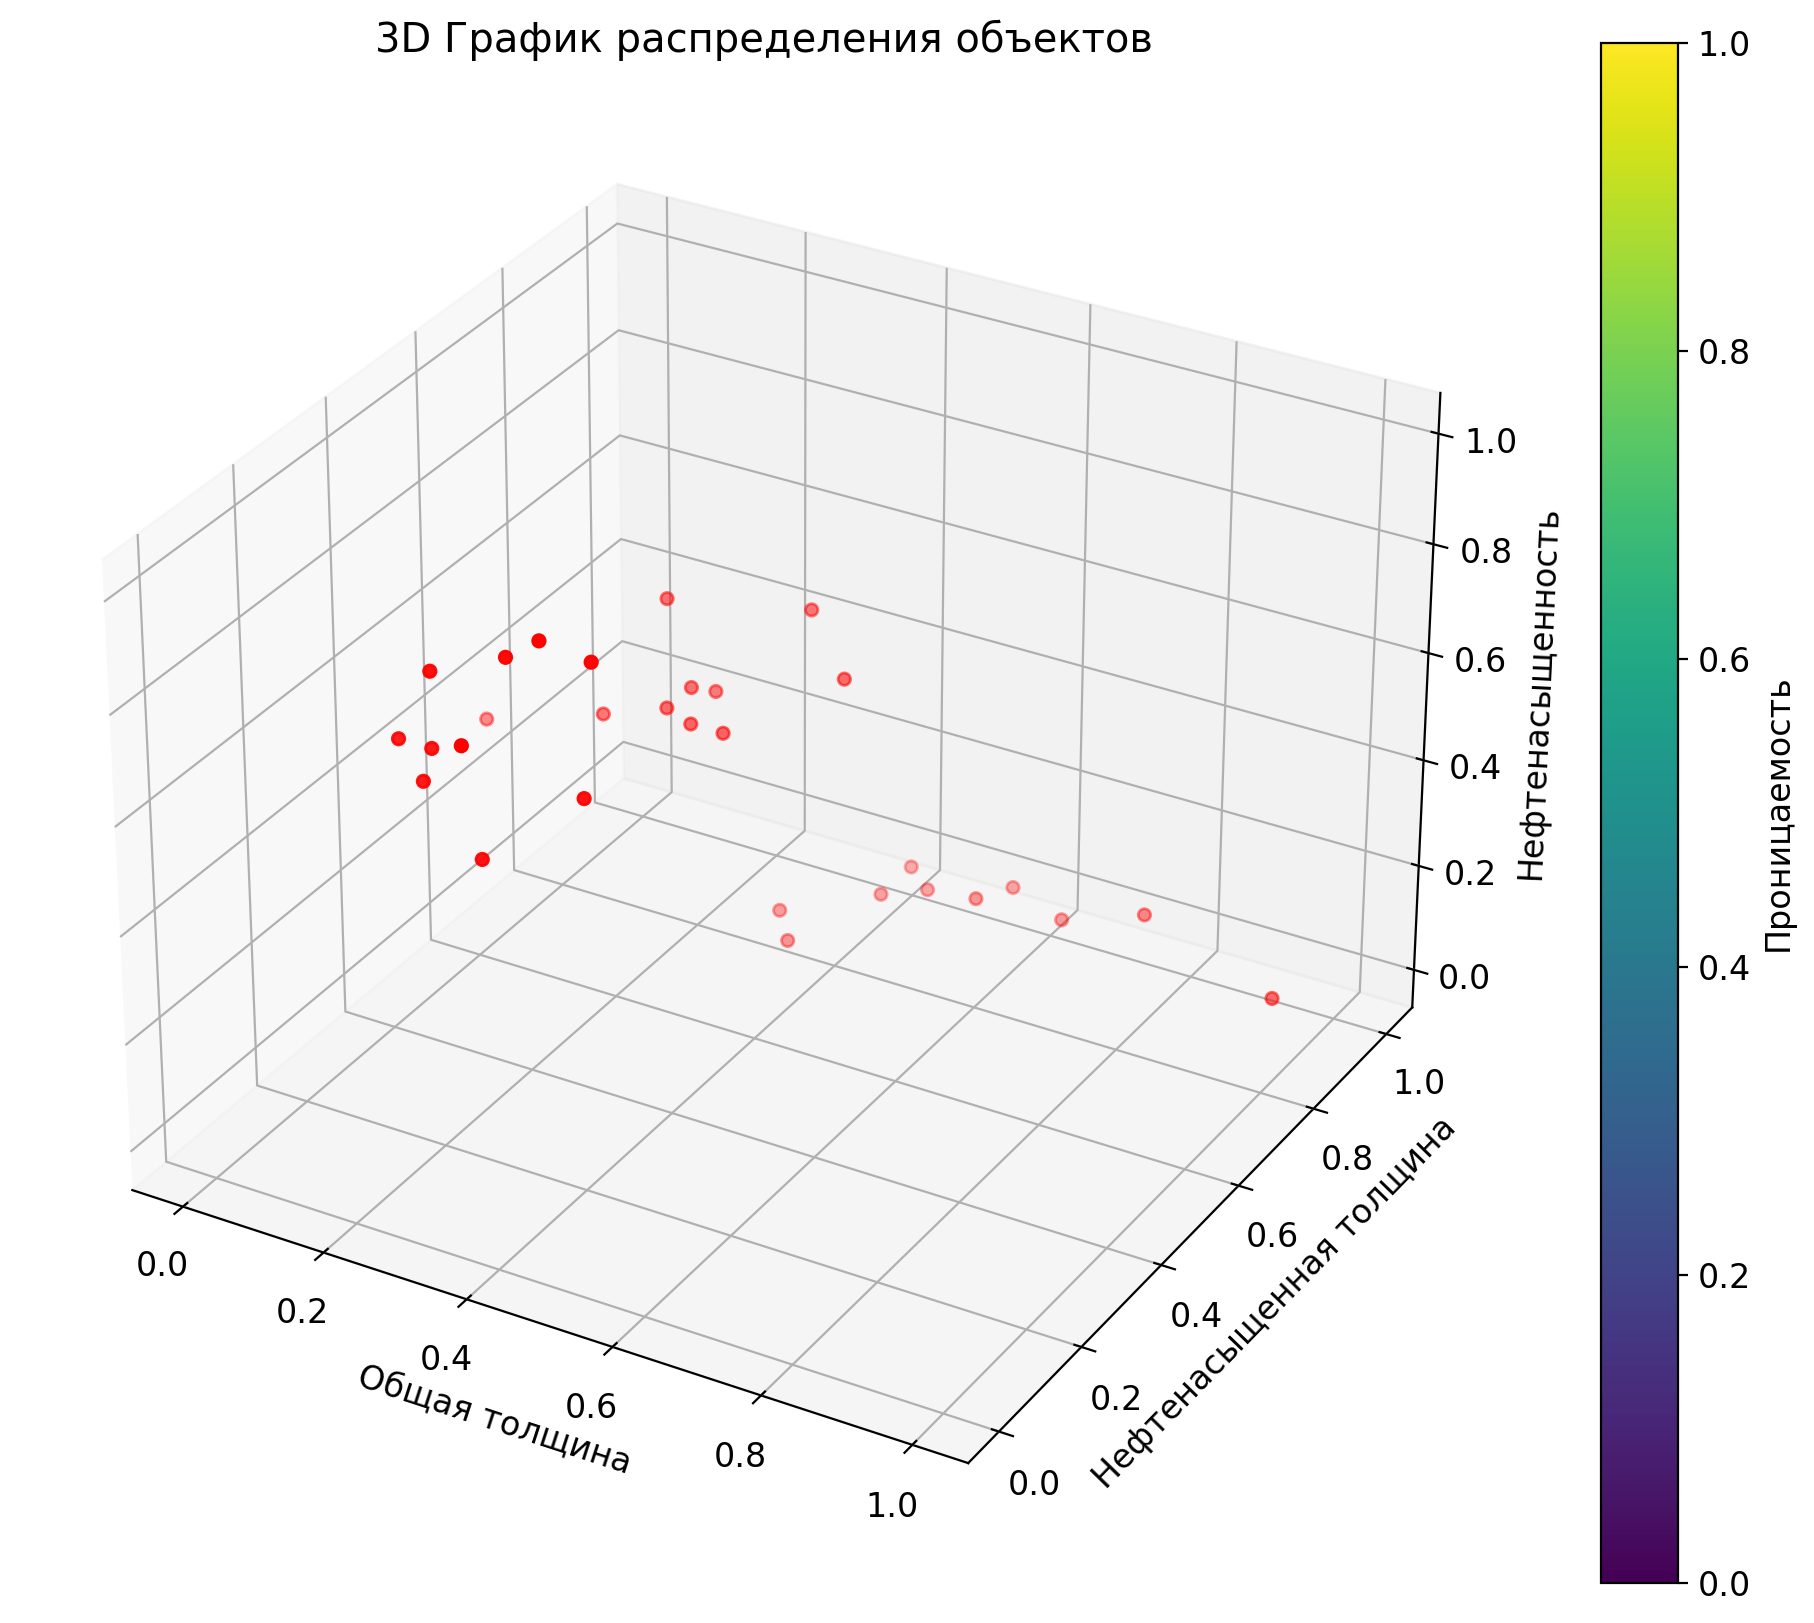

                         Проницаемость  Общая толщина  \
Проницаемость                 1.000000      -0.201106   
Общая толщина                -0.201106       1.000000   
Нефтенасыщенная толщина      -0.797240       0.349980   
Нефтенасыщенность             0.851819      -0.407142   

                         Нефтенасыщенная толщина  Нефтенасыщенность  
Проницаемость                          -0.797240           0.851819  
Общая толщина                           0.349980          -0.407142  
Нефтенасыщенная толщина                 1.000000          -0.887341  
Нефтенасыщенность                      -0.887341           1.000000  


In [40]:
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

correlation_matrix = df_normalized.corr()

column_to_exclude = correlation_matrix.abs().idxmax().idxmax()
print(column_to_exclude)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Исключение характеристики с максимальным коэффициентом корреляции
df_3d = df_normalized.drop(columns=[column_to_exclude])

scatter = ax.scatter(df_3d.iloc[:, 0], df_3d.iloc[:, 1], df_3d.iloc[:, 2], c='r', marker='o')

ax.set_xlabel(df_3d.columns[0])
ax.set_ylabel(df_3d.columns[1])
ax.set_zlabel(df_3d.columns[2])
ax.set_title('3D График распределения объектов')

fig.colorbar(scatter, ax=ax, label=column_to_exclude)

plt.show()
print(correlation_matrix)

Б) Стандартизированные характеристики.

Проницаемость


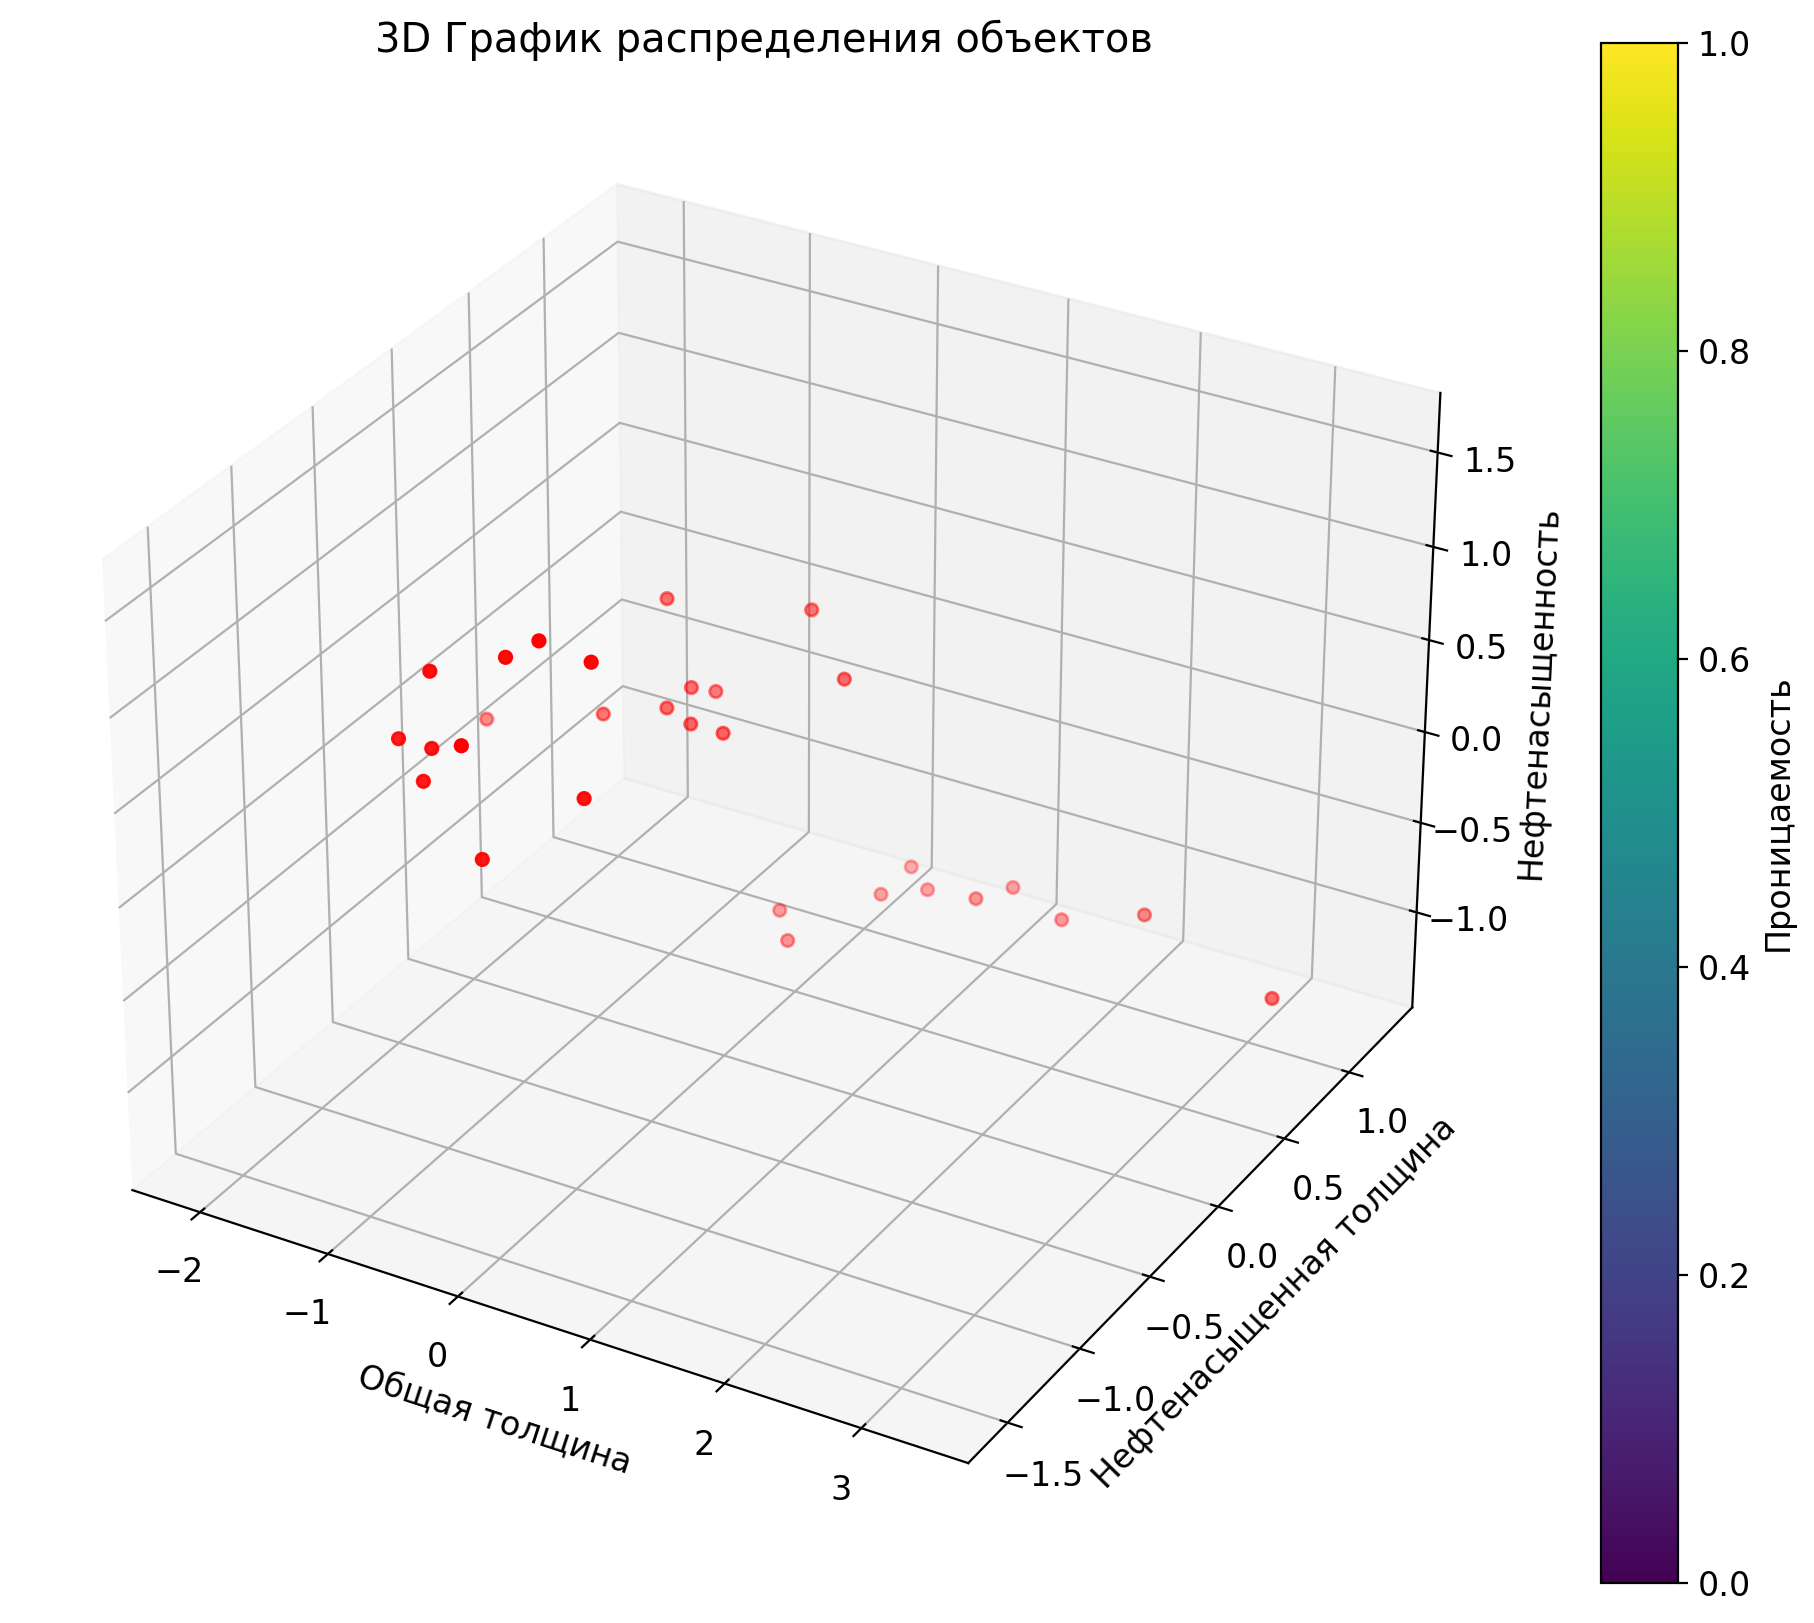

                         Проницаемость  Общая толщина  \
Проницаемость                 1.000000      -0.201106   
Общая толщина                -0.201106       1.000000   
Нефтенасыщенная толщина      -0.797240       0.349980   
Нефтенасыщенность             0.851819      -0.407142   

                         Нефтенасыщенная толщина  Нефтенасыщенность  
Проницаемость                          -0.797240           0.851819  
Общая толщина                           0.349980          -0.407142  
Нефтенасыщенная толщина                 1.000000          -0.887341  
Нефтенасыщенность                      -0.887341           1.000000  


In [41]:
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

correlation_matrix = df_standardized.corr()

column_to_exclude = correlation_matrix.abs().idxmax().idxmax()
print(column_to_exclude)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Исключение характеристики с максимальным коэффициентом корреляции
df_3d = df_standardized.drop(columns=[column_to_exclude])

scatter = ax.scatter(df_3d.iloc[:, 0], df_3d.iloc[:, 1], df_3d.iloc[:, 2], c='r', marker='o')

ax.set_xlabel(df_3d.columns[0])
ax.set_ylabel(df_3d.columns[1])
ax.set_zlabel(df_3d.columns[2])
ax.set_title('3D График распределения объектов')

fig.colorbar(scatter, ax=ax, label=column_to_exclude)

plt.show()
print(correlation_matrix)

4. Получить разбиение объектов на кластеры 3 разными иерархическими методами и методом k-means. Попробуйте в одном из методов использовать расстояние Чебышева. Построить дендрограммы для иерархических методов. 


In [42]:
columns_for_clustering = df_standardized.columns

А) Метод Варда.

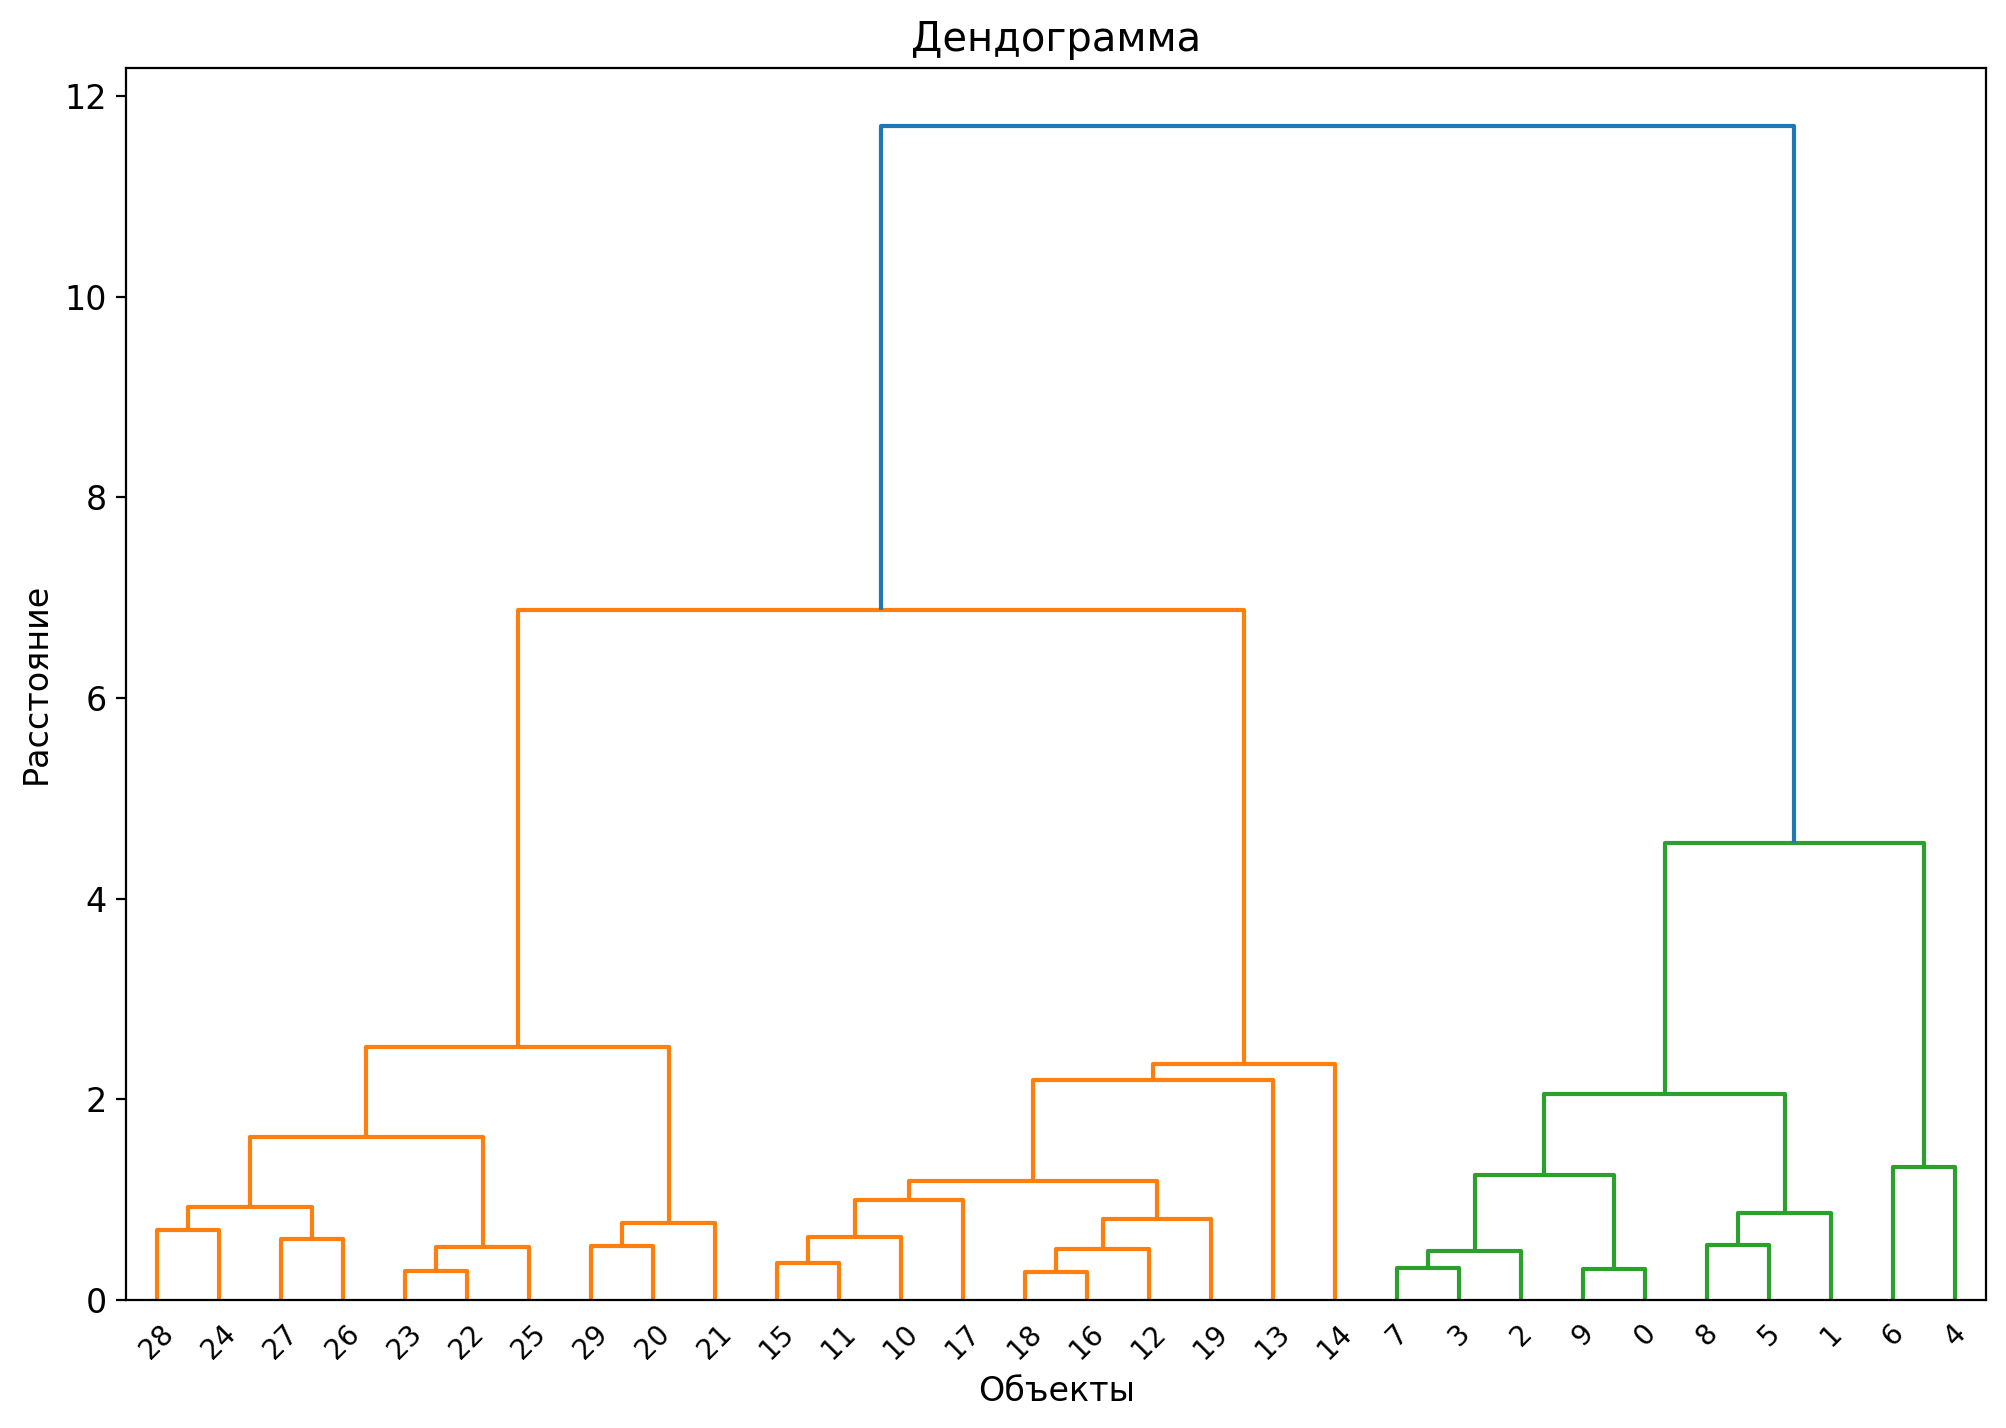

In [43]:
hierarchical_clustering_ward = AgglomerativeClustering(n_clusters=3, linkage = 'ward', metric='euclidean')
df['ward_labels'] = hierarchical_clustering_ward.fit_predict(df_standardized[columns_for_clustering])

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(df_standardized[columns_for_clustering], method='ward'), labels=df_standardized.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендограмма')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

Б) Полная связь.

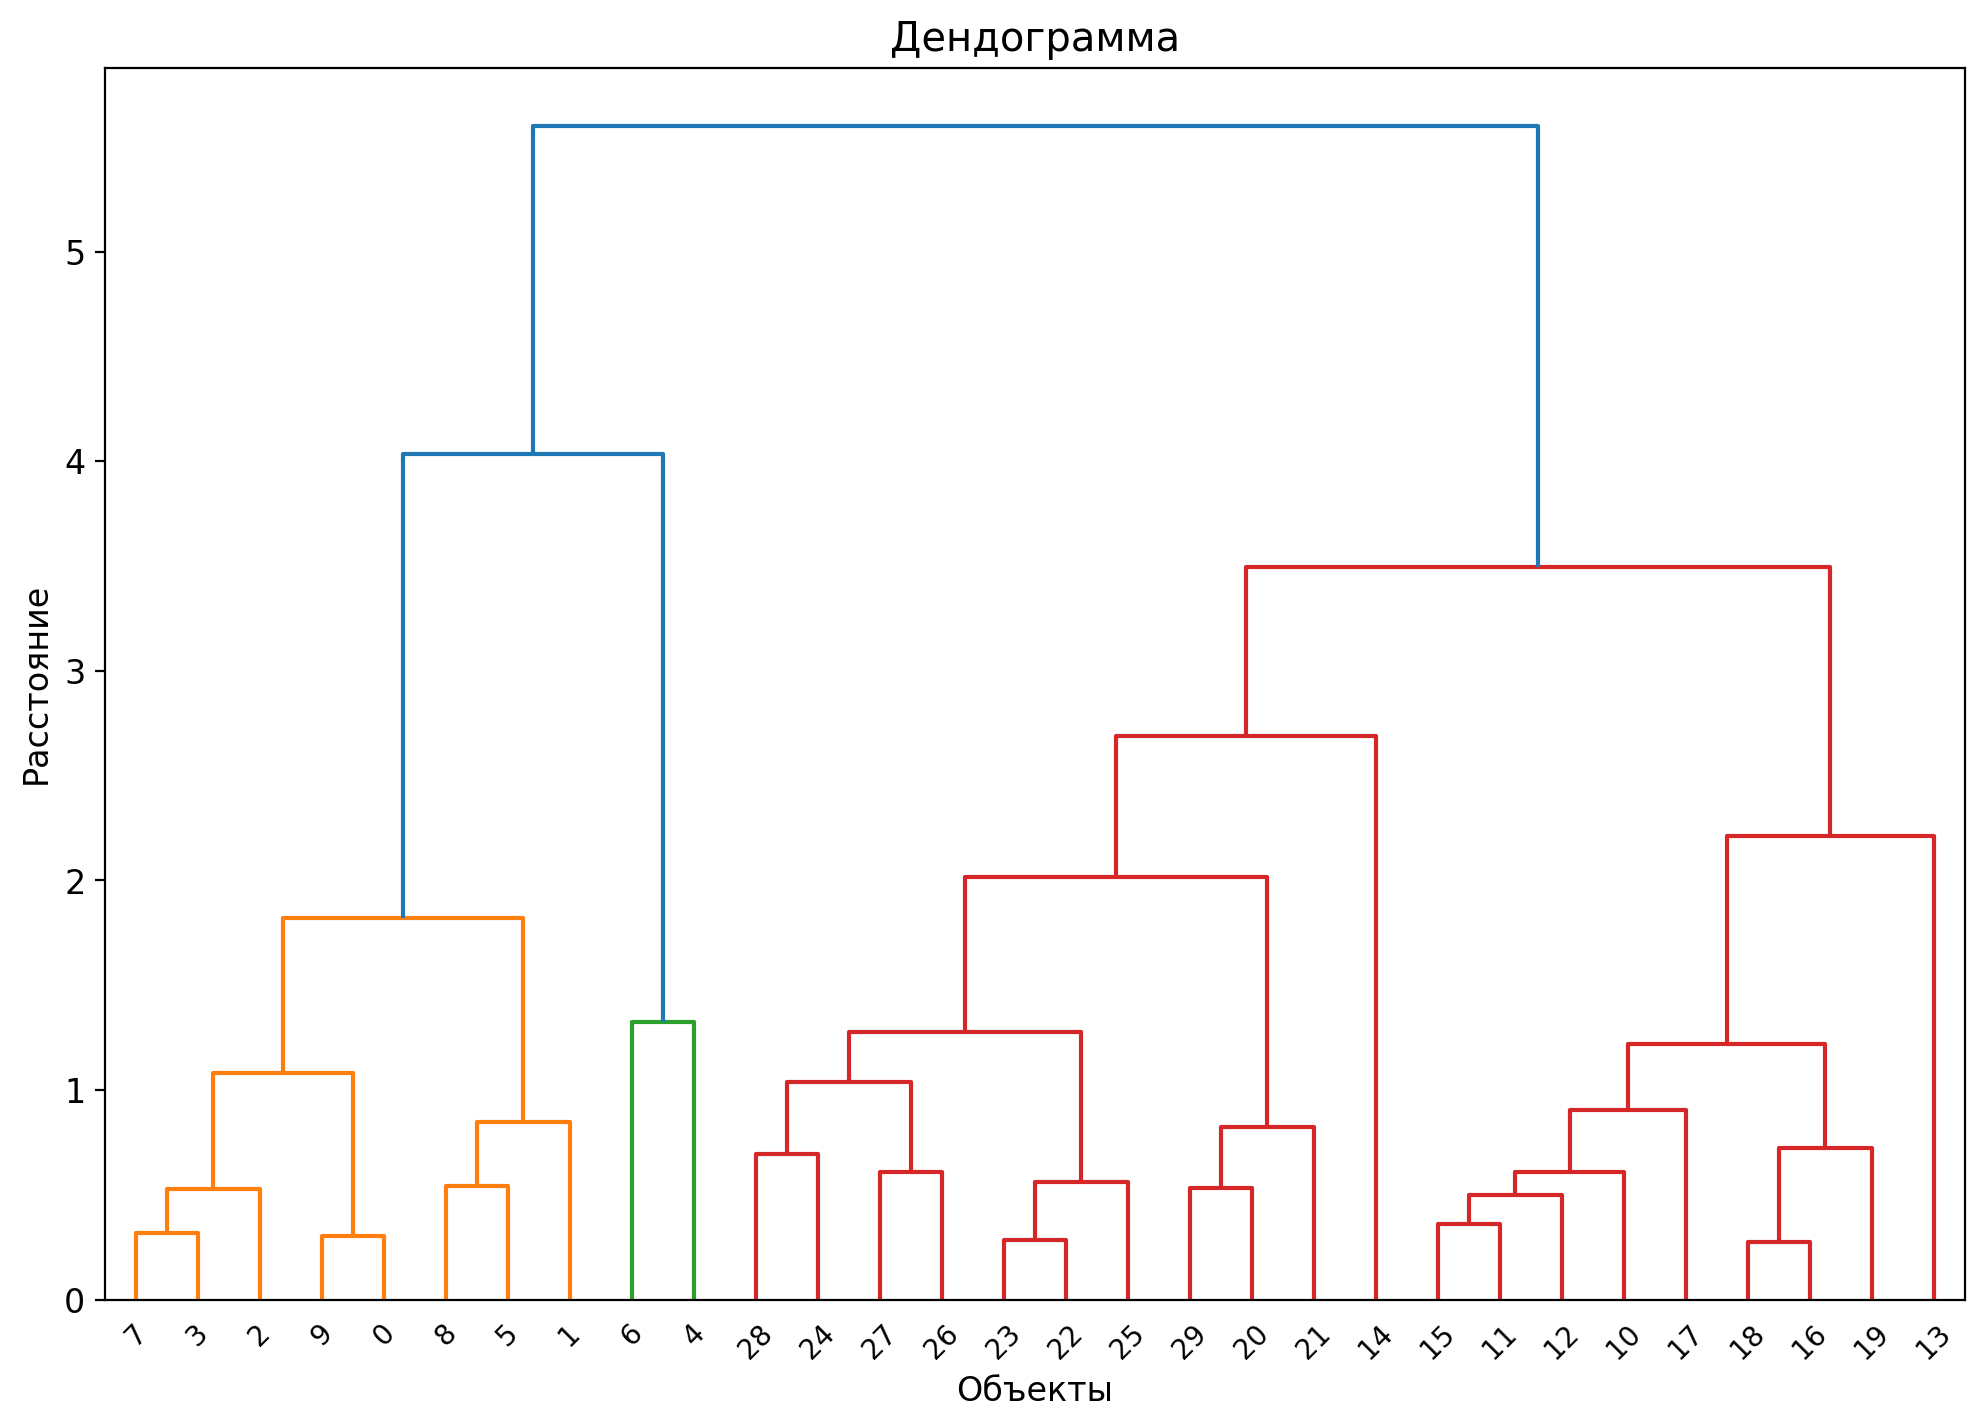

In [44]:
hierarchical_clustering_complete = AgglomerativeClustering(n_clusters=3, linkage = 'complete', metric='chebyshev')
df['complete_labels'] = hierarchical_clustering_complete.fit_predict(df_standardized[columns_for_clustering])

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(df_standardized[columns_for_clustering], method='complete'), labels=df_standardized.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендограмма')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

В) Одиночная связь.

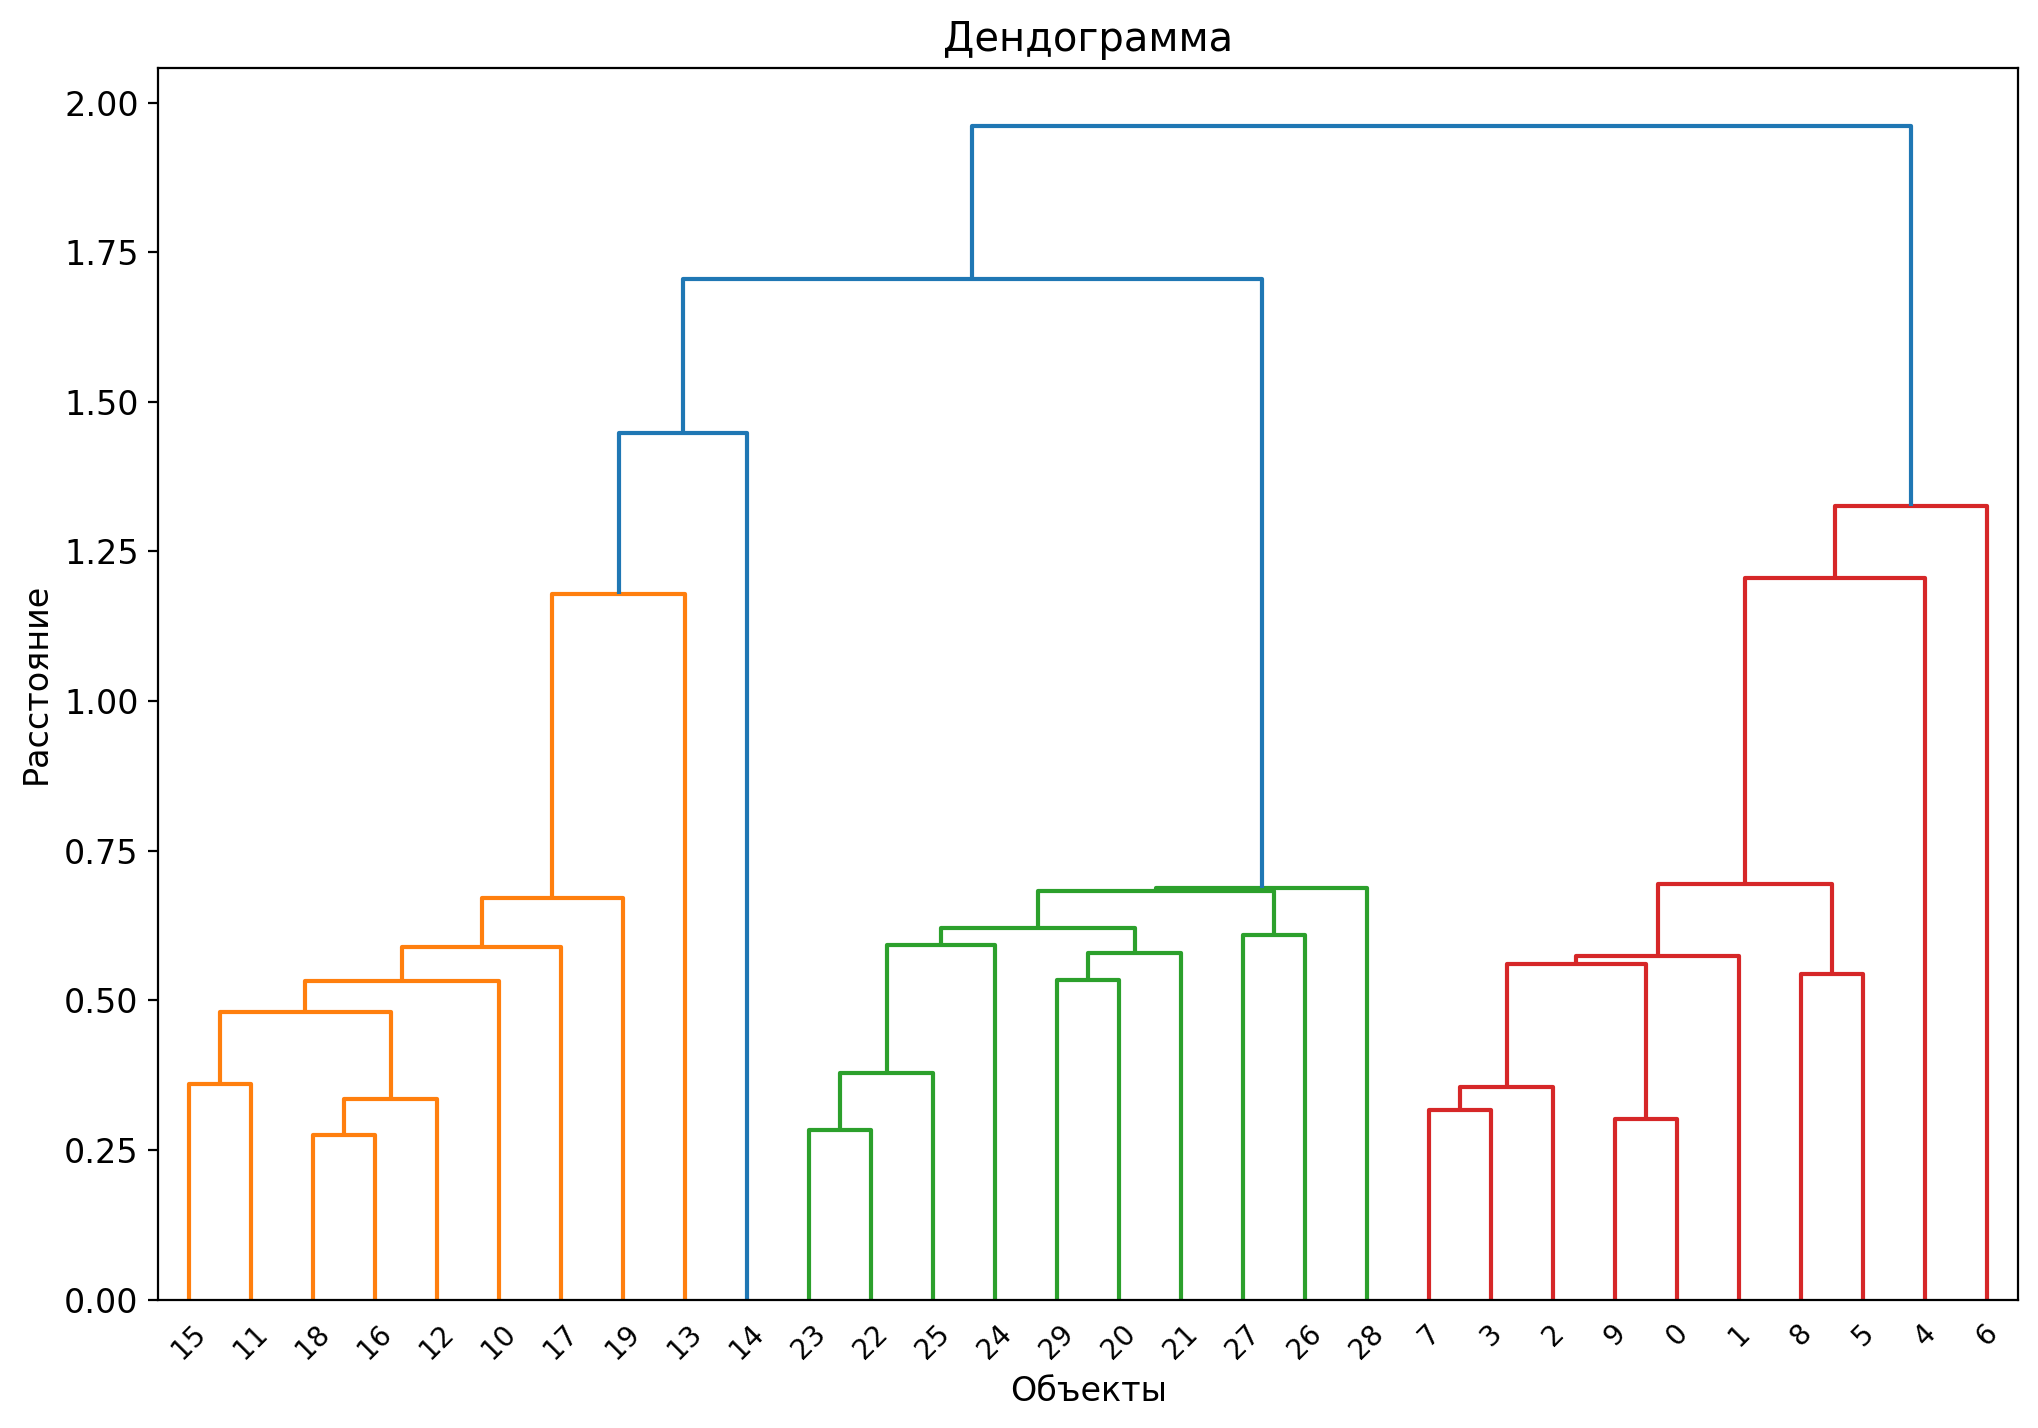

In [45]:
hierarchical_clustering_single = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
df['single_labels'] = hierarchical_clustering_single.fit_predict(df_standardized[columns_for_clustering])

plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(df_standardized[columns_for_clustering], method='single'), labels=df_standardized.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Дендограмма')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

Г) Метод k-means.

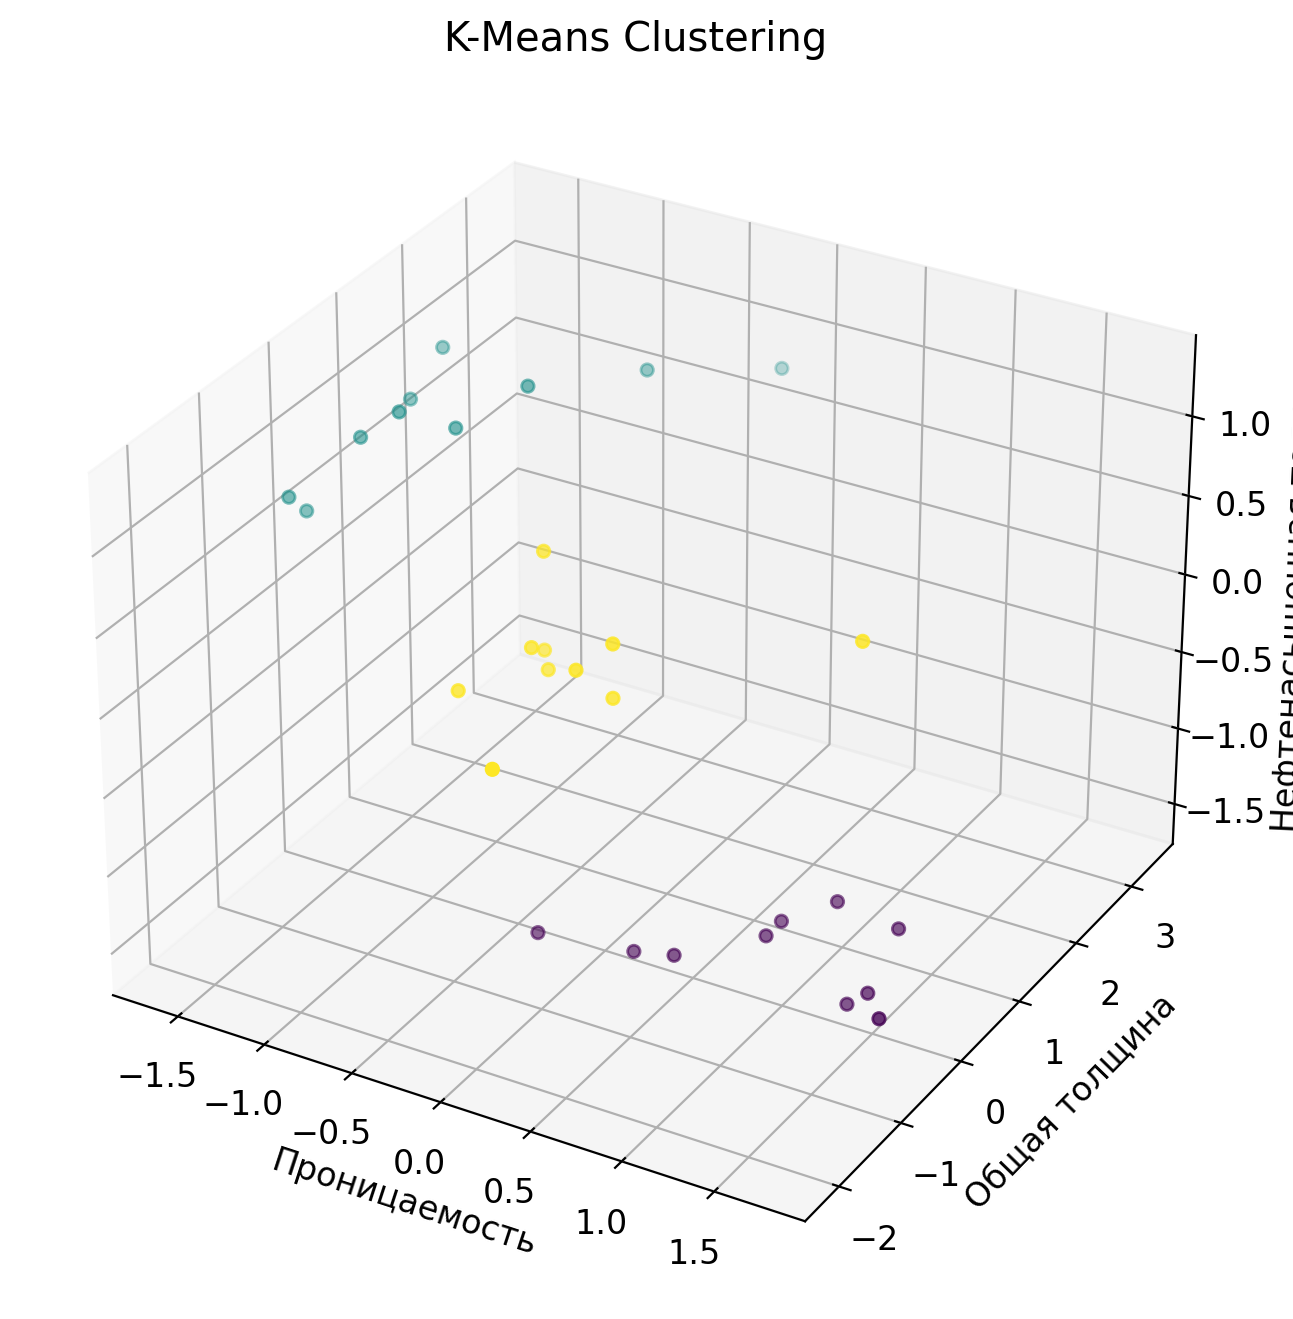

In [46]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_standardized['kmeans_labels'] = kmeans.fit_predict(df_standardized[columns_for_clustering])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_standardized['Проницаемость'], df_standardized['Общая толщина'], 
                     df_standardized['Нефтенасыщенная толщина'], c=df_standardized['kmeans_labels'], 
                     marker='o')

ax.set_xlabel('Проницаемость')
ax.set_ylabel('Общая толщина')
ax.set_zlabel('Нефтенасыщенная толщина')
ax.set_title('K-Means Clustering')

plt.show()

5. Сравнить  результаты полученные при разбиении  для различных методов, сделать вывод об устойчивости разбиения. Результаты кластеризации показать в таблице.

In [47]:
results_table = pd.DataFrame({
    'Метод Ward c метрикой Евклидовой': df['ward_labels'],
    'Метод Complete с метрикой Чебышева': df['complete_labels'],
    'Метод Single с метрикой Евклидовой': df['single_labels'],
    'K-means': df_standardized['kmeans_labels']
})

results_table.to_excel('results_table.xlsx', index=False)